## Modules

In [0]:
# !pip install tensorflow==2.0.0
!pip install tensorflow-gpu==2.1.0
!pip install bert-for-tf2
!pip install sentencepiece
!pip install matplotlib

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 450kB 57.5MB/s 
     |████████████████████████████████| 3.8MB 34.8MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

     |████████████████████████████████| 40kB 3.3MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.13.4-cp36-none-any.whl size=29944 sha256=7ce43e2d360773bde653704beaa91d5b364027b2742ed44d01141f36b63a8fed
  Stored in directory: /root/.cache/pip/wheels/d1/14/6d/b36f1618f939480ce5baa48e4d918ea00669f1cbbec4419514
  Created wheel for py-params: filename=py_params-0.8.2-cp36-none-any.whl size=4635 sha256=b71b4ee3fc8cb4be537a9b2a393d3425edd5dff86013b5effad04d25841d79a1
  Stored in directory: /root/.cache/pip/wheels/83/3a/9c/baf35d6f17f0c2c6b61bf8ac3ab9fc12df0e41432ccaeecacb
  Created wheel for params-flow: filename=params_flow-0.7.4-cp36-none-any.whl size=16195 sha256=1406258f6bba5d23b5dd91cc4697897fa2ff3fa5a7098565f2f6ad90039d6bc4
  Stored in directory: /root/.cache/pip/wheels/86/30/40/507b60d68b67ac87f35e95c98f5b296a32f146d5ae1d1d5aa7
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.0MB 4.8MB/s 


In [0]:
# Download tokenization from repo
!wget https://raw.githubusercontent.com/google-research/ALBERT/master/tokenization.py

--2020-02-07 12:45:22--  https://raw.githubusercontent.com/google-research/ALBERT/master/tokenization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16318 (16K) [text/plain]
Saving to: ‘tokenization.py’

tokenization.py     100%[===================>]  15.94K  --.-KB/s    in 0.007s  

2020-02-07 12:45:22 (2.12 MB/s) - ‘tokenization.py’ saved [16318/16318]



In [0]:
import tensorflow as tf
import bert
import os
import sentencepiece as spm
import pandas as pd
import numpy as np

import importlib
import tokenization

importlib.reload(tokenization)

import matplotlib.pyplot as plt
%matplotlib inline

## Albert_zh

In [0]:
## Local model, take bert as example
## Download bert model
!wget https://storage.googleapis.com/albert_models/albert_base_zh.tar.gz
## Unzip the file
!tar -zxvf albert_base_zh.tar.gz


# Local download
model_dir = "./albert_base"
model_ckpt   = os.path.join(model_dir, "model.ckpt-best")
vocab_file = os.path.join(model_dir, "vocab_chinese.txt")
# spm_model = os.path.join(model_dir, "30k-clean.model")

--2020-02-07 12:46:48--  https://storage.googleapis.com/albert_models/albert_base_zh.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39731739 (38M) [application/gzip]
Saving to: ‘albert_base_zh.tar.gz’

albert_base_zh.tar. 100%[===================>]  37.89M  63.3MB/s    in 0.6s    

2020-02-07 12:46:49 (63.3 MB/s) - ‘albert_base_zh.tar.gz’ saved [39731739/39731739]

albert_base/
albert_base/vocab_chinese.txt
albert_base/checkpoint
albert_base/model.ckpt-best.meta
albert_base/albert_config.json
albert_base/model.ckpt-best.index
albert_base/model.ckpt-best.data-00000-of-00001


In [0]:
# model_name = "albert_base_v2"
# model_dir    = bert.fetch_google_albert_model(model_name, "models")
# model_ckpt   = os.path.join(model_dir, "model.ckpt-best")

# vocab_file = os.path.join(model_dir, "30k-clean.vocab")
# spm_model = os.path.join(model_dir, "30k-clean.model")

model_params = bert.albert_params(model_dir)
l_bert = bert.BertModelLayer.from_params(model_params, name="albert")



In [0]:


do_lower_case = True
bert.albert_tokenization.validate_case_matches_checkpoint(do_lower_case, model_ckpt)
# tokenizer = bert.albert_tokenization.FullTokenizer(vocab_file, do_lower_case=do_lower_case)
tokenizer = tokenization.FullTokenizer(vocab_file
                                       , do_lower_case=do_lower_case
                                       # , spm_model_file=spm_model
                                       )

In [0]:

# spm_model = os.path.join(model_dir, "30k-clean.model")
# sp = spm.SentencePieceProcessor()
# sp.load(spm_model)
# do_lower_case = True

# processed_text = tokenization.preprocess_text("to token", lower=do_lower_case)
# token_ids = tokenization.encode_ids(sp, processed_text)

In [0]:
s = "艾伊斯坦的理论测试"
tokens = tokenizer.tokenize(s)
tokens = ["[CLS]"]+tokens+['[SEP]']
word_ids = tokenizer.convert_tokens_to_ids(tokens)

print(tokens)
print(word_ids)

['[CLS]', '艾', '伊', '斯', '坦', '的', '理', '论', '测', '试', '[SEP]']
[101, 5687, 823, 3172, 1788, 4638, 4415, 6389, 3844, 6407, 102]


In [0]:
def sent2_bert_inputs(s, tokenizer, max_seq_length):
  stokens = tokenizer.tokenize(s)
  if len(stokens) > max_seq_length - 2:
      stokens = stokens[0:(max_seq_length - 2)]
  stokens = ["[CLS]"] + stokens + ["[SEP]"]
  input_ids = tokenizer.convert_tokens_to_ids(stokens)
  input_mask = [1] * len(input_ids)

  segment_ids = []
  current_segment_id = 0
  for token in stokens:
      segment_ids.append(current_segment_id)
      if token == "[SEP]":
          current_segment_id = 1
  
  while len(input_ids) < max_seq_length:
    input_ids.append(0)
    input_mask.append(0)
    segment_ids.append(0)
  return input_ids, input_mask, segment_ids


def bert_encode_inputs(sentences, tokenizer, max_seq_length):
  def _truncate_seq_pair(tokens_a, tokens_b, max_length):
    """Truncates a sequence pair in place to the maximum length."""

    # This is a simple heuristic which will always truncate the longer sequence
    # one token at a time. This makes more sense than truncating an equal percent
    # of tokens from each, since if one sequence is very short then each token
    # that's truncated likely contains more information than a longer sequence.
    while True:
      total_length = len(tokens_a) + len(tokens_b)
      if total_length <= max_length:
        break
      if len(tokens_a) > len(tokens_b):
        tokens_a.pop()
      else:
        tokens_b.pop()
  
  if len(sentences) >= 2:
    sentences = sentences[:2]
    s1 = sentences[0]
    s2 = sentences[1]

    tokens_a = tokenizer.tokenize(s1)
    tokens_b = tokenizer.tokenize(s2)
    _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
    tokens = []
    segment_ids = []

    tokens.append("[CLS]")
    segment_ids.append(0)
    for token in tokens_a:
      tokens.append(token)
      segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)

    for token in tokens_b:
      tokens.append(token)
      segment_ids.append(1)
    tokens.append("[SEP]")
    segment_ids.append(1)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
      input_ids.append(0)
      input_mask.append(0)
      segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length
    return input_ids, input_mask, segment_ids

  elif len(sentences) == 1:
    s = sentences[0]
    return sent2_bert_inputs(s, tokenizer, max_seq_length)
  else:
    print("No sentences input.")
    return

In [0]:
# sent2_bert_inputs("this is a tokenizer test", tokenizer, 128)
a = bert_encode_inputs(["你好世界"], tokenizer, 128)

## Data

### Mayi finance texts semantic data

In [0]:
!wget https://raw.githubusercontent.com/ccuulinay/texts_semantic_sim/master/data/train.txt
!wget https://raw.githubusercontent.com/ccuulinay/texts_semantic_sim/master/data/test.txt

--2020-02-07 13:09:14--  https://raw.githubusercontent.com/ccuulinay/texts_semantic_sim/master/data/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5174256 (4.9M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   4.93M  --.-KB/s    in 0.07s   

2020-02-07 13:09:15 (69.8 MB/s) - ‘train.txt’ saved [5174256/5174256]

--2020-02-07 13:09:18--  https://raw.githubusercontent.com/ccuulinay/texts_semantic_sim/master/data/test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2553277 (2.4M) [text/plain]

In [0]:
train_file = "train.txt"
test_file = "test.txt"

In [0]:


train = pd.read_csv(train_file, sep="\t", header=None, names=["q1", "q2", "label"])
test = pd.read_csv(test_file, sep="\t", header=None, names=["q1", "q2", "label"])

DATA_COLUMNS = ["q1", "q2"]
LABEL_COLUMN = 'label'

In [0]:
_train_0 = train[train[LABEL_COLUMN] == 0].sample(2500)
_train_1 = train[train[LABEL_COLUMN] == 1].sample(2500)
train = pd.concat([_train_0, _train_1])

_test_0 = test[test[LABEL_COLUMN] == 0].sample(2500)
_test_1 = test[test[LABEL_COLUMN] == 1].sample(2500)
test = pd.concat([_test_0, _test_1])


### dianping comment sentiment (sample)

In [0]:
!wget https://github.com/wshuyi/demo-chinese-text-binary-classification-with-bert/raw/master/dianping_train_test.pickle

--2020-02-07 12:52:58--  https://github.com/wshuyi/demo-chinese-text-binary-classification-with-bert/raw/master/dianping_train_test.pickle
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wshuyi/demo-chinese-text-binary-classification-with-bert/master/dianping_train_test.pickle [following]
--2020-02-07 12:52:58--  https://raw.githubusercontent.com/wshuyi/demo-chinese-text-binary-classification-with-bert/master/dianping_train_test.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561978 (549K) [application/octet-stream]
Saving to: ‘dianping_train_test.pickle’

dianping_train_test 100%[========

In [0]:
import pickle
with open("dianping_train_test.pickle", 'rb') as f:
    train, test = pickle.load(f)

In [0]:
DATA_COLUMNS = ['comment']
LABEL_COLUMN = 'sentiment'

### Data encode 

In [0]:
max_seq_len = 128

In [0]:
train_set = []
for s in train[DATA_COLUMNS].values:
  train_set.append(bert_encode_inputs(s, tokenizer, max_seq_len))
train_features_df = pd.DataFrame(train_set, columns=['word_ids', 'mask', 'segment_ids'])

test_set = []
for s in test[DATA_COLUMNS].values:
  test_set.append(bert_encode_inputs(s, tokenizer, max_seq_len))
test_features_df = pd.DataFrame(test_set, columns=['word_ids', 'mask', 'segment_ids'])


train_features = {}
train_features['word_ids'] = np.array(train_features_df['word_ids'].values.tolist())
train_features['mask'] = np.array(train_features_df['mask'].values.tolist())
train_features['segment_ids'] = np.array(train_features_df['segment_ids'].values.tolist())

test_features = {}
test_features['word_ids'] = np.array(test_features_df['word_ids'].values.tolist())
test_features['mask'] = np.array(test_features_df['mask'].values.tolist())
test_features['segment_ids'] = np.array(test_features_df['segment_ids'].values.tolist())

val_features_df = test_features_df.iloc[:1000].copy()
val_features = {}
val_features['word_ids'] = np.array(val_features_df['word_ids'].values.tolist())
val_features['mask'] = np.array(val_features_df['mask'].values.tolist())
val_features['segment_ids'] = np.array(val_features_df['segment_ids'].values.tolist())

train_labels = train[LABEL_COLUMN].values
test_labels = test[LABEL_COLUMN].values
val_labels = test.iloc[:1000][LABEL_COLUMN].values


In [0]:
# a = bert_encode_inputs(train[DATA_COLUMNS].head().values.tolist()[0], tokenizer, max_seq_len)

In [0]:
train_labels[:5]

array([0, 0, 0, 0, 0])

## Model

In [0]:
max_seq_len = 128
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
# LEARNING_RATE = 1e-5
# LEARNING_RATE = 0.000015
NUM_TRAIN_EPOCHS = 10

segment_input_flag = True
flat_flag, pool_flag = False, True

In [0]:
# Model functional
input_word_ids = tf.keras.layers.Input(shape=(max_seq_len,), dtype='int32', name="input_word_ids")
segment_ids = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32,
                                    name="segment_ids")
l_bert = bert.BertModelLayer.from_params(model_params, name="albert")

if segment_input_flag:
  inputs_list = [input_word_ids, segment_ids]
  # sequence_output = l_bert([input_word_ids, segment_ids])
else:
  inputs_list = input_word_ids

sequence_output = l_bert(inputs_list)

if flat_flag:
  cls_output = tf.keras.layers.Flatten()(sequence_output)
elif pool_flag:
  cls_output = tf.keras.layers.GlobalAveragePooling1D()(sequence_output)
else:
  cls_output = sequence_output[:, 0, :]
logits = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(cls_output)


cls = tf.keras.Model(inputs=inputs_list, outputs=logits)
# l_bert.apply_adapter_freeze()
bert.load_albert_weights(l_bert, model_ckpt)
cls.compile(optimizer=tf.optimizers.Adam(lr=LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])
print(cls.summary())

Loading google-research/ALBERT weights...
Done loading 23 BERT weights from: ./albert_base/model.ckpt-best into <bert.model.BertModelLayer object at 0x7fc189292e10> (prefix:albert_2). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights
	global_step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
____________________________________________

In [0]:
# Sequential
'''l_input_ids  = tf.keras.layers.Input(shape=(max_seq_len,), dtype='int32')
cls = tf.keras.Sequential([
        # tf.keras.layers.Input(shape=(max_seq_length,), dtype='int32', name='input_ids'),
        l_input_ids,
        l_bert,
        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(128, activation=tf.nn.relu),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Dense(1, activation=tf.nn.softmax)
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

cls.build(input_shape=(None, max_seq_len))
l_bert.apply_adapter_freeze()
bert.load_bert_weights(l_bert, model_ckpt)
cls.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(lr=LEARNING_RATE), metrics=['accuracy'])

print(cls.summary())
'''

"l_input_ids  = tf.keras.layers.Input(shape=(max_seq_len,), dtype='int32')\ncls = tf.keras.Sequential([\n        # tf.keras.layers.Input(shape=(max_seq_length,), dtype='int32', name='input_ids'),\n        l_input_ids,\n        l_bert,\n        tf.keras.layers.Flatten(),\n        # tf.keras.layers.Dense(128, activation=tf.nn.relu),\n        # tf.keras.layers.Dropout(0.5),\n        tf.keras.layers.Dense(64, activation=tf.nn.relu),\n        # tf.keras.layers.Dropout(0.5),\n        # tf.keras.layers.Dense(1, activation=tf.nn.softmax)\n        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)\n])\n\ncls.build(input_shape=(None, max_seq_len))\nl_bert.apply_adapter_freeze()\nbert.load_bert_weights(l_bert, model_ckpt)\ncls.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(lr=LEARNING_RATE), metrics=['accuracy'])\n\nprint(cls.summary())\n"

In [0]:
output_dir = "./"
checkpoint_name = os.path.join(output_dir, "albert_for_zh_semantic.ckpt")

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_name,
                                                     save_weights_only=True,
                                                     verbose=1)
steps_per_epoch = int(round(len(train_features['word_ids']))//BATCH_SIZE)
val_steps = int(1000//BATCH_SIZE)
# callback = StopTrainingClassComplete()

if segment_input_flag:
  train_fit_inputs = [train_features['word_ids'], train_features['segment_ids']]
  val_fit_inputs = [val_features['word_ids'], val_features['segment_ids']]
else:
  train_fit_inputs = train_features['word_ids']
  val_fit_inputs = val_features['word_ids']
history = cls.fit(
        train_fit_inputs,
        train_labels,
        epochs=NUM_TRAIN_EPOCHS, # Will raise error when epoch number is float. 
        batch_size=BATCH_SIZE,
        # steps_per_epoch = steps_per_epoch,
        # validation_steps=val_steps,
        validation_data=(val_fit_inputs, val_labels),
        verbose=1,
        # callbacks=[cp_callback]
)

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 84s 17ms/sample - loss: 0.7039 - accuracy: 0.5018 - val_loss: 0.7280 - val_accuracy: 0.0420
Epoch 2/10
5000/5000 [==============================] - 72s 14ms/sample - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.7052 - val_accuracy: 0.2720
Epoch 3/10
5000/5000 [==============================] - 71s 14ms/sample - loss: 0.6891 - accuracy: 0.5368 - val_loss: 0.5984 - val_accuracy: 0.9370
Epoch 4/10
5000/5000 [==============================] - 72s 14ms/sample - loss: 0.6571 - accuracy: 0.6154 - val_loss: 0.5557 - val_accuracy: 0.7790
Epoch 5/10
5000/5000 [==============================] - 72s 14ms/sample - loss: 0.6045 - accuracy: 0.6762 - val_loss: 0.5865 - val_accuracy: 0.6660
Epoch 6/10
5000/5000 [==============================] - 71s 14ms/sample - loss: 0.5542 - accuracy: 0.7232 - val_loss: 0.4574 - val_accuracy: 0.8610
Epoch 7/10
5000/5000 [==============================] - 72s 14ms

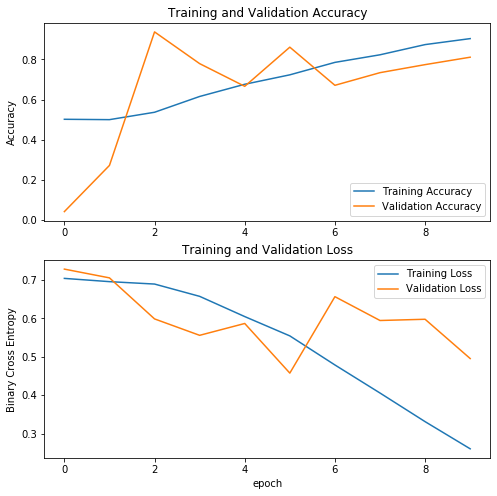

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Binary Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score



In [0]:
test_prop = cls.predict((test_features['word_ids'], test_features['segment_ids']))
test_pred = np.where(test_prop > 0.5, 1, 0).flatten()

In [44]:
cm = confusion_matrix(test_labels, test_pred)  
print(cm)  
print()
print("F1 score", f1_score(test_labels, test_pred))
print('Accuracy', accuracy_score(test_labels, test_pred))
print('ROC AUC SCORE', roc_auc_score(test_labels, test_pred))
print(classification_report(test_labels, test_pred))

[[2052  448]
 [1091 1409]]

F1 score 0.6467753041083314
Accuracy 0.6922
ROC AUC SCORE 0.6922
              precision    recall  f1-score   support

           0       0.65      0.82      0.73      2500
           1       0.76      0.56      0.65      2500

    accuracy                           0.69      5000
   macro avg       0.71      0.69      0.69      5000
weighted avg       0.71      0.69      0.69      5000

